# PolyAI - Polymer Classification (Random Forest)
This notebook tests the training and evaluation of a Random Forest classifier to predict the polymer type based on structural and chemical features.

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [76]:
df = pd.read_csv(r"..\data\polyai_generated_fake_dataset.csv")

### Random Forest Definition

In [111]:
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# 5-Fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Prediction and Evaluation

In [127]:
y_pred = cross_val_predict(rf, X, y, cv=cv)
accuracy = accuracy_score(y, y_pred)

In [128]:
print(f"Cross-validated Accuracy: {accuracy:.2f}\n")
print(classification_report(y, y_pred, target_names=label_encoder.classes_))

Cross-validated Accuracy: 1.00

              precision    recall  f1-score   support

          PE       1.00      1.00      1.00        12
         PET       1.00      1.00      1.00        12
          PP       1.00      1.00      1.00        12
         PVC       1.00      1.00      1.00        12
         TPE       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



#### Accuracy per fold

In [130]:
scores = cross_val_score(rf, X, y, cv=cv)
print("Accuracy per fold:", np.round(scores, 3))
print("Mean CV accuracy:", round(scores.mean(), 3))

Accuracy per fold: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


### Confusion Matrix

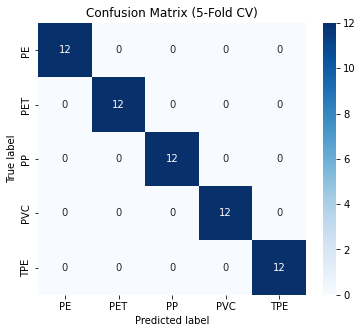

In [131]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (5-Fold CV)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### Feature Importance
The most important feature is the most used to split the data across all trees in the forest.

In [147]:
# Fit model on entire dataset to compute feature importance
rf.fit(X, y)

importances = rf.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

print("\nTop Feature Importances:")
print(fi_df.head(3))


Top Feature Importances:
      Feature  Importance
8   feature_9    0.151062
7   feature_8    0.123927
9  feature_10    0.119034


#### Plotting Feature Importance

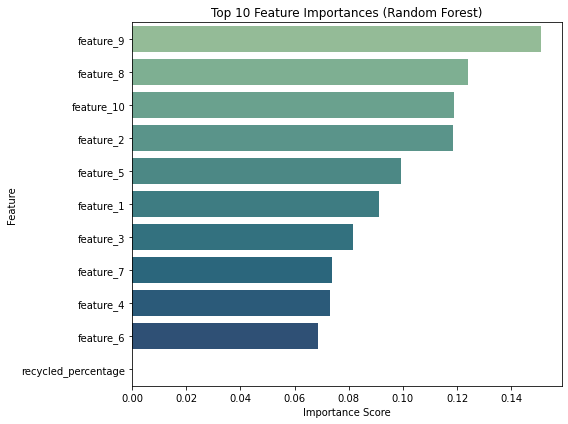

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=fi_df, palette="crest")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()